In [1]:
import pandas as pd


In [2]:
# MyPath = "c:\\Users\\phili\\OneDrive\\Documents\\Formations JEDHA\\Data Essential - Sept 2023\\Prep Work\\Intro to Python\\panda training"
# Data = pd.read_csv(MyPath+"/covid-19.csv")
Data = pd.read_csv("./assets/covid-19.csv")
Data = Data.iloc[:, 1:]

TheMask = Data["geoId"] == "US"
USData = Data[TheMask]
#USData.head()

USData.reset_index(drop=True, inplace=True)
# USData.head()

# créer une colonne
USData["Cumulated Cases"] = 0
USData.head()

NbRows = len(USData)
#print(NbRows)

# Attention à l'ordre des dates dans le tableau
# On part du fond et on remonte
for i in range (NbRows-2, -1, -1):
    USData.loc[i, "Cumulated Cases"] = USData.loc[i, "cases"] + USData.loc[i+1, "Cumulated Cases"]
USData.head() 
#USData.tail()

USData["New Cases"] = 0
#USData.head()

# Ca sert à rien on a dejà la colonne cases
for i in range (NbRows-2, -1, -1):
    USData.loc[i, "New Cases"] = USData.loc[i, "Cumulated Cases"] - USData.loc[i+1, "Cumulated Cases"]
#USData.head()

USData["Growth Ratio"] = 0
#USData.head()
for i in range (NbRows-2, -1, -1):
    USData.loc[i, "Growth Ratio"] = USData.loc[i, "New Cases"] / USData.loc[i+1, "New Cases"]
#USData.head()
USData = USData.sort_values("dateRep")
#USData.head()

C:\Users\phili\AppData\Local\Temp\ipykernel_20400\2900942184.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USData["Cumulated Cases"] = 0
C:\Users\phili\AppData\Local\Temp\ipykernel_20400\2900942184.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USData["New Cases"] = 0
C:\Users\phili\AppData\Local\Temp\ipykernel_20400\2900942184.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

<Axes: xlabel='dateRep'>

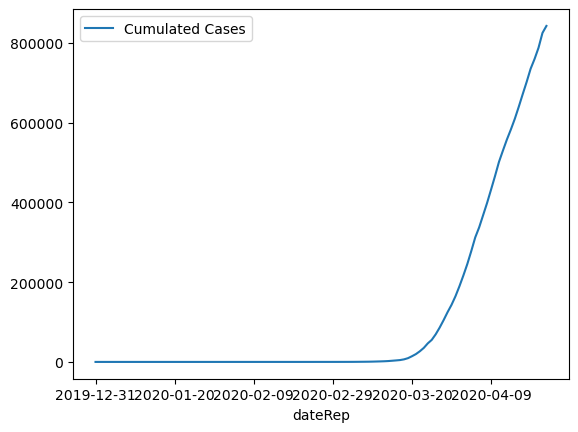

In [3]:
USData.plot.line(x="dateRep", y="Cumulated Cases")


<Axes: xlabel='dateRep'>

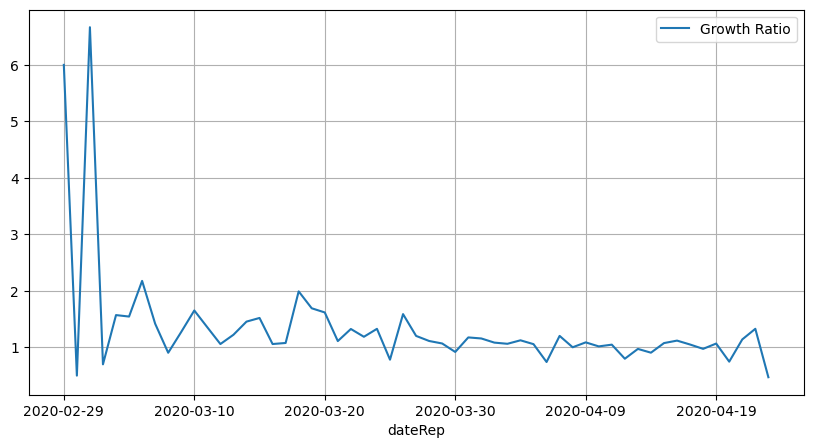

In [4]:
# C'est mieux car on a les dates qui se suivent bien
# Dans le précédent graphe c'était pas le cas (y avait des trous)
TheMask = USData["dateRep"] >= "2020-02-29"
USData[TheMask].plot.line(x="dateRep", y="Growth Ratio", figsize=(10, 5), grid=True)

In [5]:
USData.to_csv("./assets/USData.csv")